In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import IsolationForest

In [2]:
#1. read the data

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#2. represent the outliers

data = pd.DataFrame(np.random.randn(100, 3))
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

<AxesSubplot:xlabel='Customer Lifetime Value'>

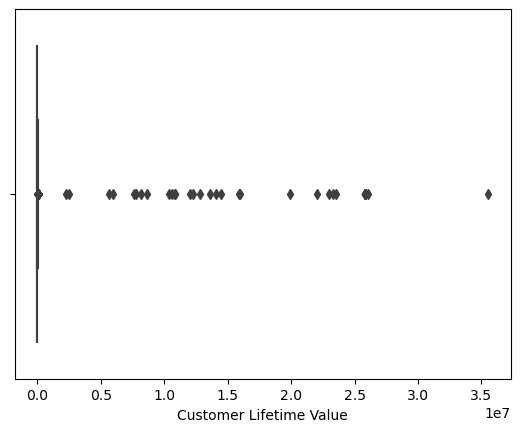

In [5]:
sns.boxplot(data['Customer Lifetime Value'])

<AxesSubplot:xlabel='Income'>

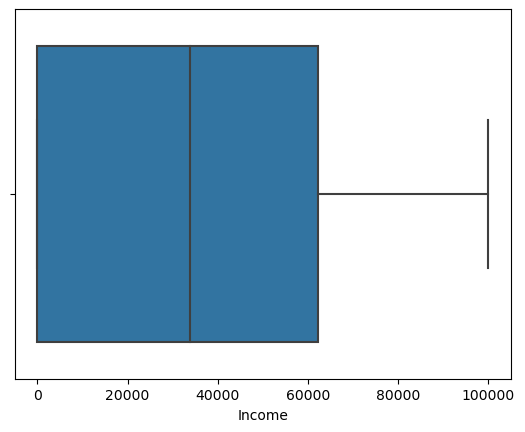

In [6]:
sns.boxplot(data['Income'])

<AxesSubplot:xlabel='Months Since Policy Inception'>

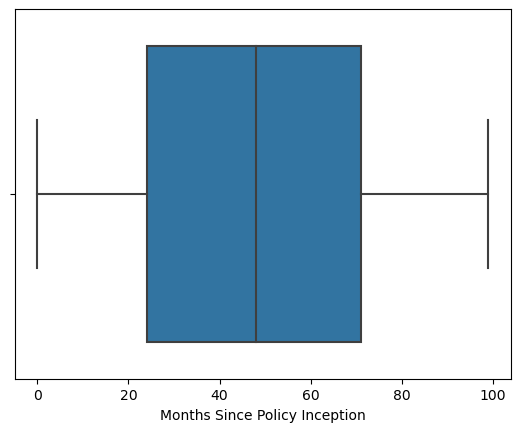

In [7]:
sns.boxplot(data['Months Since Policy Inception'])

<AxesSubplot:xlabel='Number of Open Complaints'>

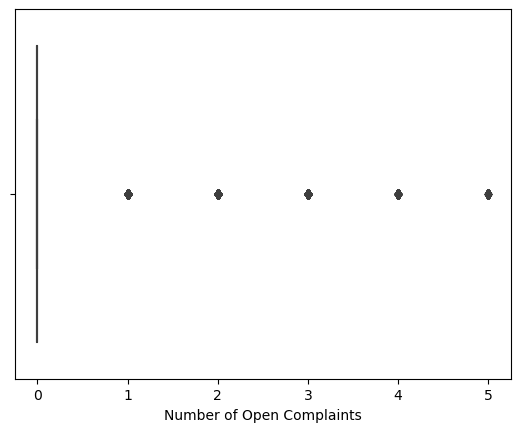

In [8]:
sns.boxplot(data['Number of Open Complaints'])

<AxesSubplot:xlabel='Number of Policies'>

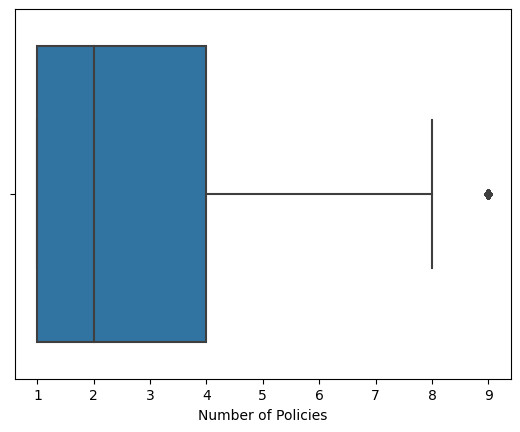

In [9]:
sns.boxplot(data['Number of Policies'])

<AxesSubplot:xlabel='Total Claim Amount'>

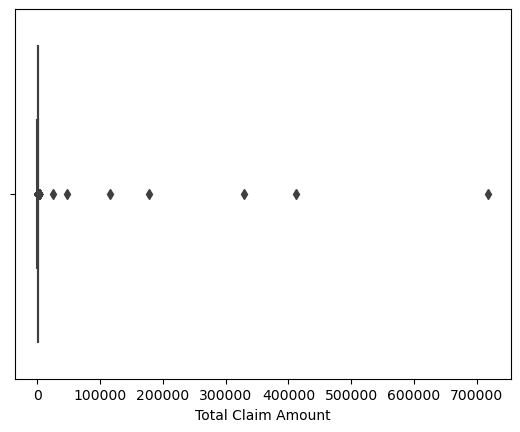

In [10]:
sns.boxplot(data['Total Claim Amount'])

In [11]:
# remove the outliers by applying the inter-quartile range 

In [12]:
Q1 = np.percentile(data['Customer Lifetime Value'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Customer Lifetime Value'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data['Customer Lifetime Value']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data['Customer Lifetime Value']<=lower)
# Removing the outliers
data.drop(upper_array[0],inplace=True)
data.drop(lower_array[0],inplace=True)
 
print("New Shape: ", data.shape)

Old Shape:  (9134, 24)


KeyError: '[False] not found in axis'

In [ ]:
#use z-score to normalise the data

In [13]:
# Generate some random data
data = np.random.normal(loc=0, scale=1, size=100)

# Calculate the z-scores
z_scores = (data - np.mean(data)) / np.std(data)

# Define a threshold for the z-scores
threshold = 2

# Filter out the outliers
filtered_data = data[abs(z_scores) < threshold]

# Print the filtered data
print(filtered_data)

[ 0.11466957  0.56584075 -0.16432987 -0.5265673   0.96691346 -0.38809394
  1.17116627 -0.27511457  1.33221595 -0.31641097 -0.44303536 -0.19234229
 -0.38618463  0.65938985 -0.6582011  -1.57128057  1.17109261  0.2441674
  1.55583807 -1.49296862 -0.12640351  0.54737863  1.54077098  0.62835213
  1.16734752  0.78576661  1.05925329 -0.72689423  1.9419412  -0.7918846
 -0.16506721 -0.30606731  1.53939284  0.26541452  1.34588425 -0.487921
 -0.25658306  0.45609686 -0.43529744 -0.43561129  1.89109929 -0.23589928
  0.05495385  0.64485881 -0.09426107 -0.36054897 -0.62388693 -0.28330222
 -1.1299754   0.1839096  -0.93367921 -0.63949871  1.43318598  0.286696
 -0.7599509  -0.68542077 -0.33590474  0.96624811  0.2556601   0.86789378
  0.25527768 -0.18808025  0.91097771  0.40285332  0.63944298 -0.81346609
  0.49386003 -0.36991248  0.89403261 -1.3010079   0.42890217  1.01722252
  1.73955526  1.02689899  0.06397886 -1.3147592   1.21952762  0.40092873
  1.91432389  0.19139592 -0.42948514 -1.40487355  1.48281

In [ ]:
# remove the outliers by applying the inter-quartile range 

In [14]:
Q1 = np.percentile(data['Total Claim Amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Total Claim Amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data['Total Claim Amount']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data['Total Claim Amount']<=lower)
# Removing the outliers
data.drop(upper_array[0],inplace=True)
data.drop(lower_array[0],inplace=True)
 
print("New Shape: ", data.shape)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices